## Project: Dogs Vs Cats classification

* part: 1
* Building the convent network CNN from scratch.
* Working only on 2000 pics, 1000 for training, 500 for validation, 500 for testing.
* I use small data to figure out overfitting and low accuracy, then fighting them.

* Note: In part 2 I will use a pre-trained CNN.

* studying from book: Deep Learning with Python by Francois Chollet.
* Dataset: https://www.kaggle.com/c/dogs-vs-cats/data .

# 1- Data Preparing

In [1]:
import os, shutil

In [2]:
# new base dir of all the data
base_dir = '/home/hwary/Deep Learning With Python/5-DogsVsCats/cats_and_dogs_small'
os.mkdir(base_dir)

In [3]:
# Dir.s for the Training, Validating, and Testing Data.
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [4]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [5]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [6]:
# Dirs of the cats and dogs
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [7]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [8]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

In [9]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)


In [10]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)


In [11]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [12]:
# copying 1000 pics from the original_data dir to the training_data dir
fnames = ['cat.{}.jpg'.format(i+1) for i in range(1000)]
original_dataset_dir = 'original_data/train/cats'

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
# copying the next 500 pics from the original_data dir to the validation data dir

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
original_dataset_dir = 'original_data/train/cats'

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)


In [14]:
# copying the next 500 pics from the original_data dir to the testing data dir

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
original_dataset_dir = 'original_data/train/cats'

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


split data for Dogs

In [15]:
# copying 1000 pics from the original_data dir to the training data dir
fnames = ['dog.{}.jpg'.format(i+1) for i in range(1000)]
original_dataset_dir = 'original_data/train/dogs'

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [16]:
# copying 1000 pics from the original_data dir to the validation data dir

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
original_dataset_dir = 'original_data/train/dogs'

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [17]:
# copying 1000 pics from the original_data dir to the testing data dir

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
original_dataset_dir = 'original_data/train/dogs'

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [18]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

('total training cat images:', 1000)
('total training dog images:', 1000)
('total validation cat images:', 500)
('total validation dog images:', 500)
('total test cat images:', 500)
('total test dog images:', 500)


building the model

# 2- Building the network CNN

In [19]:
from keras import layers
from keras import models

model = models.Sequential()


Using TensorFlow backend.


In [20]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [22]:
# configuration the model for training
from keras import optimizers
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4), 
                metrics=['acc'])


In [23]:
# Using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

base_dir = '/home/hwary/Deep Learning With Python/5-DogsVsCats/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# the training Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# the validating Generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 114s 1s/step - loss: 0.6916 - acc: 0.5230 - val_loss: 0.6712 - val_acc: 0.5910
Epoch 2/10
100/100 [==============================] - 110s 1s/step - loss: 0.6548 - acc: 0.6160 - val_loss: 0.6414 - val_acc: 0.6450
Epoch 3/10
100/100 [==============================] - 113s 1s/step - loss: 0.6014 - acc: 0.6850 - val_loss: 0.6295 - val_acc: 0.6430
Epoch 4/10
100/100 [==============================] - 110s 1s/step - loss: 0.5675 - acc: 0.7065 - val_loss: 0.6105 - val_acc: 0.6590
Epoch 5/10
100/100 [==============================] - 110s 1s/step - loss: 0.5437 - acc: 0.7295 - val_loss: 0.7099 - val_acc: 0.6080
Epoch 6/10
100/100 [==============================] - 112s 1s/step - loss: 0.5187 - acc: 0.7450 - val_loss: 0.5853 - val_acc: 0.6860
Epoch 7/10
100/100 [==============================] - 110s 1s/step - loss: 0.4905 - acc: 0.7560 - val_loss: 0.6620 - val_acc: 0.6540
Epoch 8/10
100/100 [==============================] - 111s 1s/step - 

In [25]:
# Saving the model
model.save('cats_and_dogs_small_1.h5')

In [26]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Data Augmentation

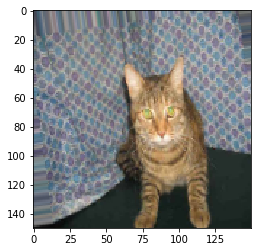

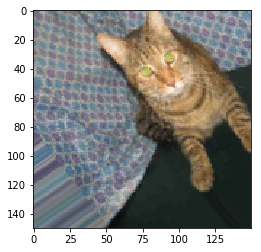

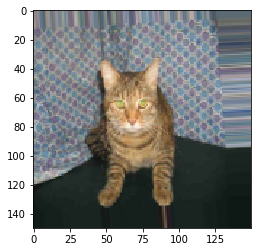

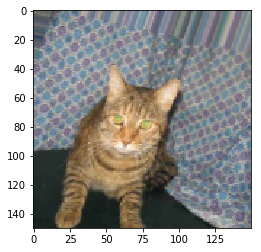

In [27]:
from keras.preprocessing import image

train_cats_dir = os.path.join(train_dir, 'cats')

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

# Fighting the Overfitting
* the new model adding dropout layer and trining using the data-augmentation generators

In [28]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])


In [29]:
#the data-augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 170s 2s/step - loss: 0.6950 - acc: 0.5144 - val_loss: 0.6880 - val_acc: 0.5390
Epoch 2/20
100/100 [==============================] - 171s 2s/step - loss: 0.6864 - acc: 0.5469 - val_loss: 0.7608 - val_acc: 0.5000
Epoch 3/20
100/100 [==============================] - 167s 2s/step - loss: 0.6730 - acc: 0.5837 - val_loss: 0.6483 - val_acc: 0.6230
Epoch 4/20
100/100 [==============================] - 169s 2s/step - loss: 0.6730 - acc: 0.5794 - val_loss: 0.6343 - val_acc: 0.6440
Epoch 5/20
100/100 [==============================] - 166s 2s/step - loss: 0.6562 - acc: 0.6034 - val_loss: 0.7237 - val_acc: 0.5480
Epoch 6/20
100/100 [==============================] - 170s 2s/step - loss: 0.6485 - acc: 0.6297 - val_loss: 0.6054 - val_acc: 0.6600
Epoch 7/20
100/100 [==============================] - 167s 2s/step - loss: 0.6356 - acc: 0.6244 - val_loss: 0.6450 - v

In [30]:
# saving the model number 2
model.save('cats_and_dogs_small_2.h5')

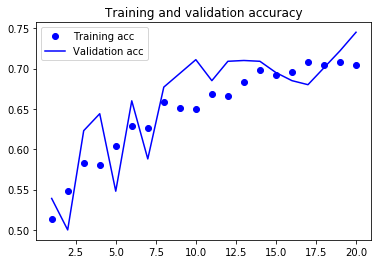

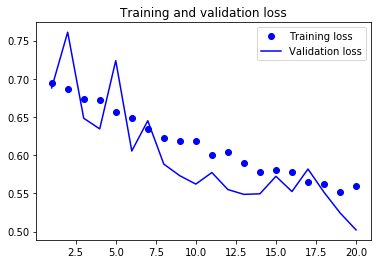

In [31]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

part one is finished
* Acc: 70%
* Loss: 56%
* Val_acc: 74%
* Val_loss: 50%

Note : after 50 epochs 'not only 20', we will reach accuracy 82%
    but i have no GPU only core-i5 cpu.

in part 2, using a pretrained convent 'CNN', we wil reach accuracy 97%